> This is a rework of my task during Computer Vision class in 2022.

> Goal(s):
- to implement image low-pass and high-pass filter with FFT (Fast Fourier Transform) and to design Butterworth Notch Filter to remove repetitive noise on the input image.

# Import Library

In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Low-pass Filter with FFT

> Low-pass Filter preserves low-frequency signals at a specific level pass through while attenuating high-frequency signals. It is commonly used to smooth images.

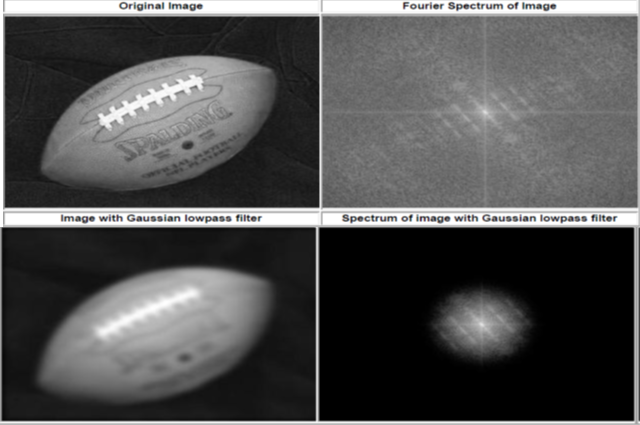

In [3]:
url = 'https://it.mathworks.com/help/examples/images/win64/AdjustContrastOfRGBImageExample_01.png'

In [4]:
def generate_img(url):
  req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
  img_data = urllib.request.urlopen(req).read()
  img_array = np.frombuffer(img_data, np.uint8)
  img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
  return img

In [5]:
def show_img(img, title, cmap=None):
  plt.imshow(img, cmap=cmap)
  plt.title(title)
  plt.axis('off')

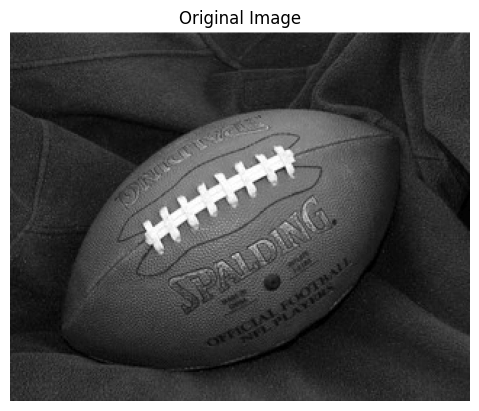

In [6]:
img = cv2.cvtColor(generate_img(url), cv2.COLOR_BGR2GRAY)
img = img[25:280, 83:400]
show_img(img, 'Original Image', 'gray')

> This work will using this following picture as guide:

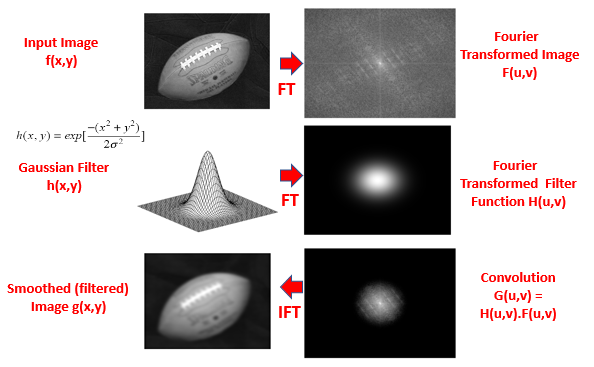

## Original Image to Fourier Transformed Image

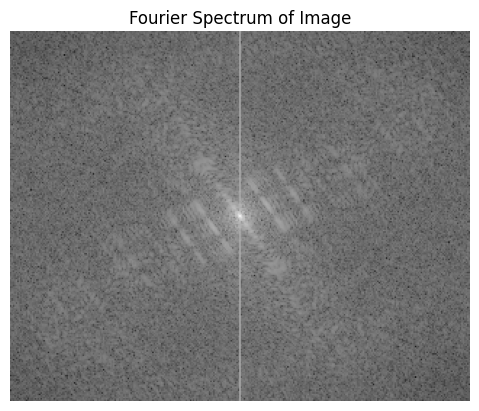

In [7]:
F = np.fft.fft2(img)
F = np.fft.fftshift(F)
show_img(np.log(np.abs(F)), 'Fourier Spectrum of Image', 'gray')

> Hence, the image above is the Fourier Transformed Image `F(u, v)`.

## Gaussian Low-pass Filter to Fourier Transformed Filter Function

> Gaussian Low-pass Filter based on this formula:

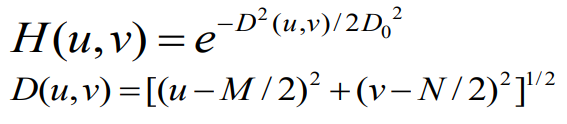

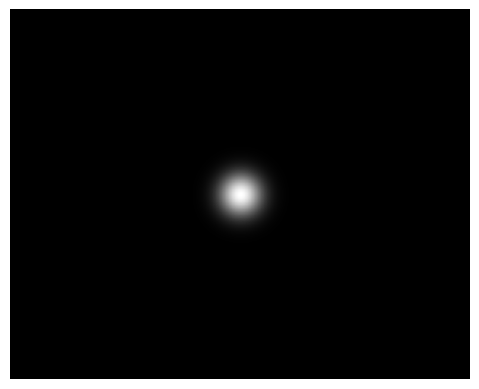

In [8]:
M, N = F.shape
H = np.zeros((M, N), dtype=np.float32)
D0 = 10

for u in range(M):
  for v in range(N):
    D = np.sqrt((u - M/2) ** 2 + (v - N/2) ** 2)
    H[u, v] = np.exp(-1 * (D ** 2 / (2 * D0 ** 2)))

show_img(H, '', 'gray')

> Hence, the image above is the Fourier Transformed Filter Function `H(u, v)`.

## Convolution to Smoothed (filtered) Image

> Multiplying the Fourier Transformed Image `F(u, v)` and Fourier Transformed Filter Function `H(u, v)`.

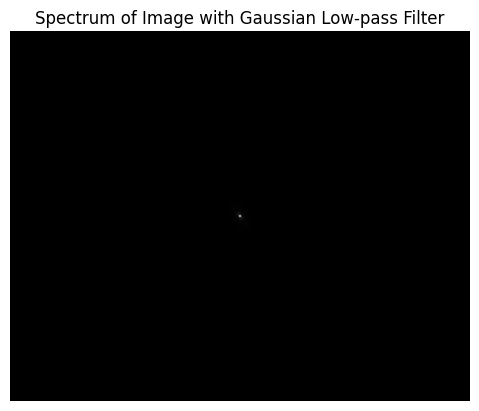

In [9]:
G = F * H
show_img(np.abs(G), 'Spectrum of Image with Gaussian Low-pass Filter', 'gray')

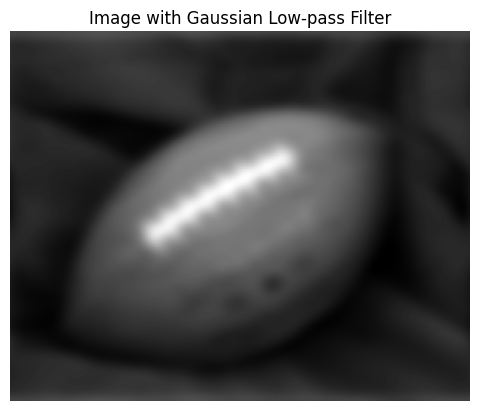

In [10]:
g = np.fft.ifftshift(G)
g = np.fft.ifft2(g)
show_img(np.abs(g), 'Image with Gaussian Low-pass Filter', 'gray')

> Hence, the image above is the Smoothed (filtered) Image `g(x, y)`.

## Result

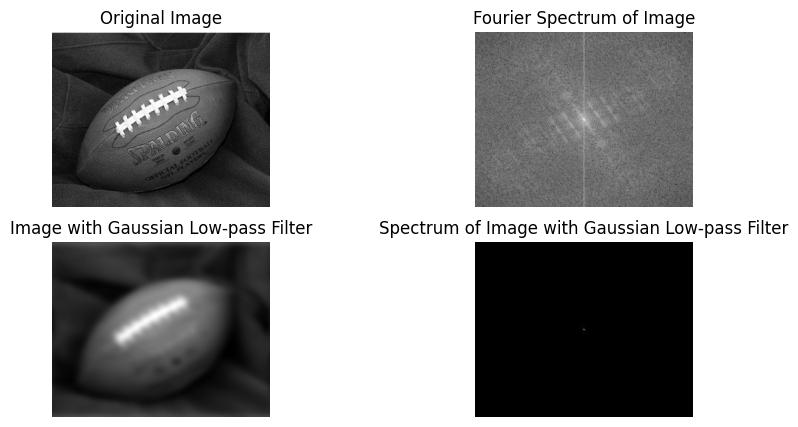

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
show_img(img, 'Original Image', 'gray')
plt.subplot(2, 2, 2)
show_img(np.log(np.abs(F)), 'Fourier Spectrum of Image', 'gray')
plt.subplot(2, 2, 3)
show_img(np.abs(g), 'Image with Gaussian Low-pass Filter', 'gray')
plt.subplot(2, 2, 4)
show_img(np.abs(G), 'Spectrum of Image with Gaussian Low-pass Filter', 'gray')

# 2. High-pass Filter with FFT

> High-pass Filter preserves high-frequency signals to pass through while attenuating low-frequency signals. It is commonly used to sharpen images and enhance edge contours.

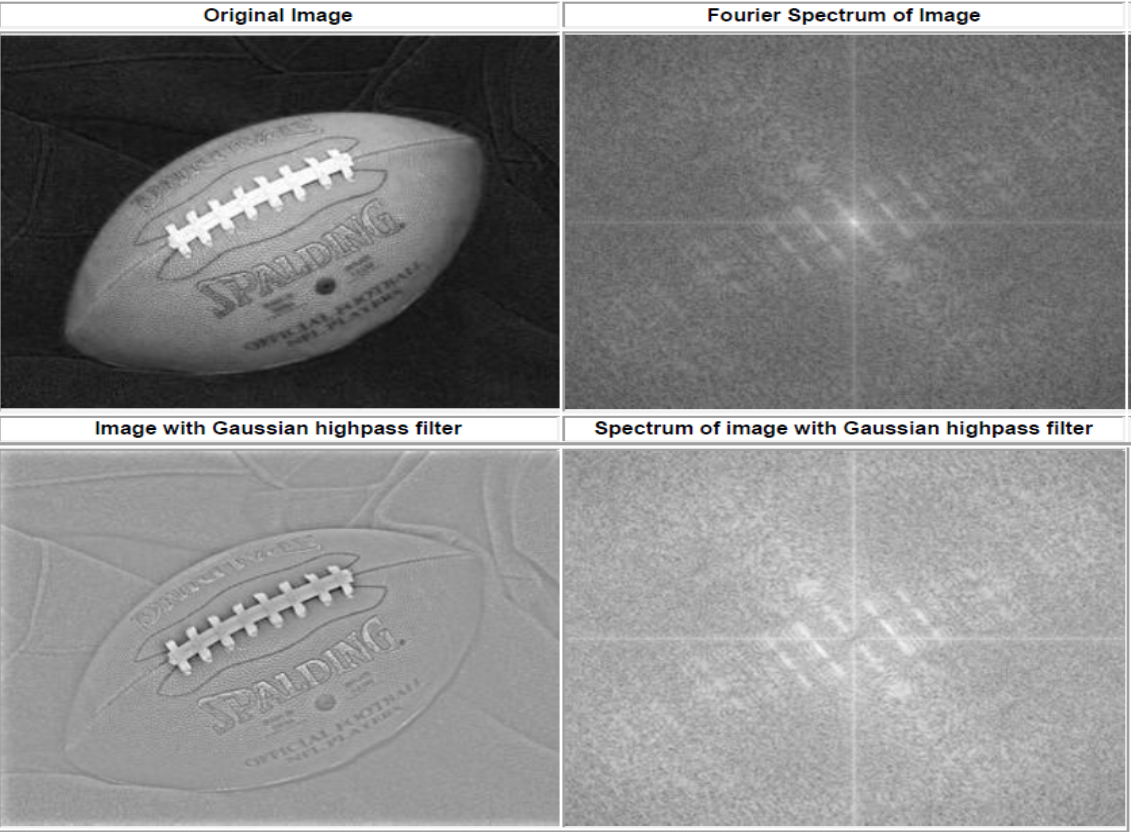

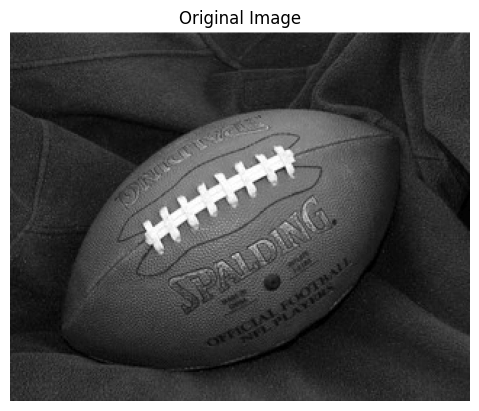

In [12]:
show_img(img, 'Original Image', 'gray')

> This work will using this following picture as guide:

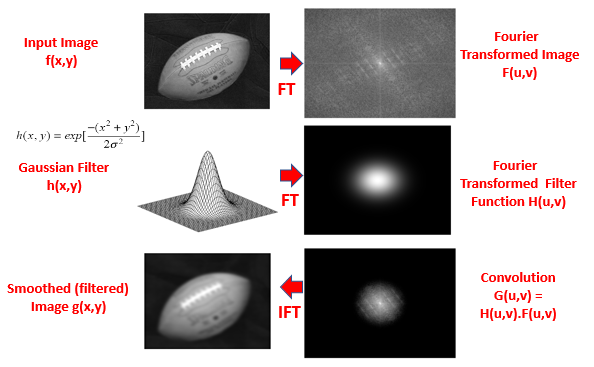

## Original Image to Fourier Transformed Image

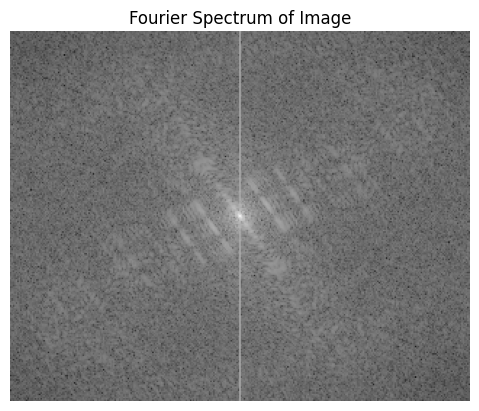

In [13]:
F = np.fft.fft2(img)
F = np.fft.fftshift(F)
show_img(np.log(np.abs(F)), 'Fourier Spectrum of Image', 'gray')

> Hence, the image above is the Fourier Transformed Image `F(u, v)`.

## Gaussian High-pass Filter to Fourier Transformed Filter Function

> Gaussian High-pass Filter based on this formula:

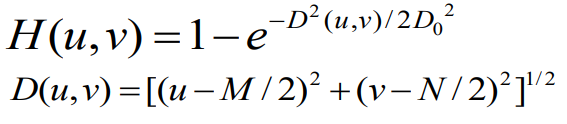

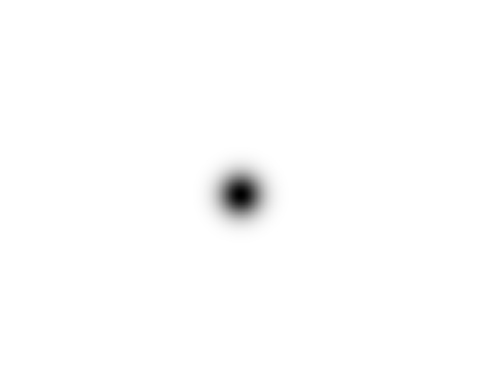

In [14]:
M, N = F.shape
H = np.zeros((M, N), dtype=np.float32)
D0 = 10

for u in range(M):
  for v in range(N):
    D = np.sqrt((u - M/2) ** 2 + (v - N/2) ** 2)
    H[u, v] = 1 - np.exp(-1 * (D ** 2 / (2 * D0 ** 2)))

show_img(H, '', 'gray')

> Hence, the image above is the Fourier Transformed Filter Function `H(u, v)`.

## Convolution to Smoothed (filtered) Image

> Multiplying the Fourier Transformed Image `F(u, v)` and Fourier Transformed Filter Function `H(u, v)`.

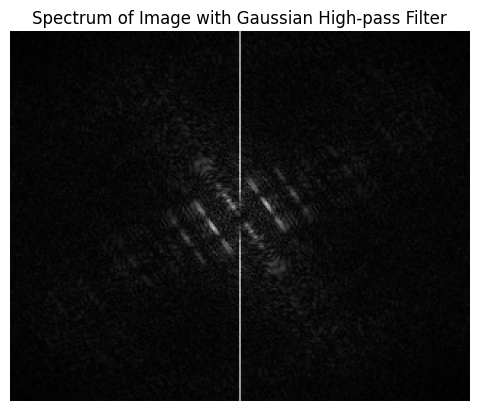

In [15]:
G = F * H
show_img(np.abs(G), 'Spectrum of Image with Gaussian High-pass Filter', 'gray')

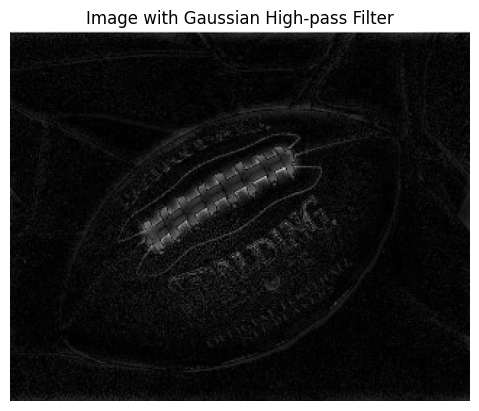

In [16]:
g = np.fft.ifftshift(G)
g = np.fft.ifft2(g)
show_img(np.abs(g), 'Image with Gaussian High-pass Filter', 'gray')

> Hence, the image above is the Smoothed (filtered) Image `g(x, y)`.

## Result

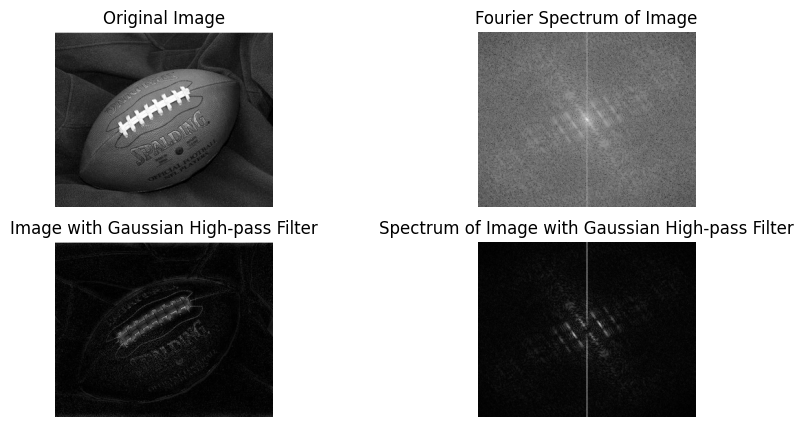

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
show_img(img, 'Original Image', 'gray')
plt.subplot(2, 2, 2)
show_img(np.log(np.abs(F)), 'Fourier Spectrum of Image', 'gray')
plt.subplot(2, 2, 3)
show_img(np.abs(g), 'Image with Gaussian High-pass Filter', 'gray')
plt.subplot(2, 2, 4)
show_img(np.abs(G), 'Spectrum of Image with Gaussian High-pass Filter', 'gray')

# 3. Butterworth Notch Filter to remove repetitive noise

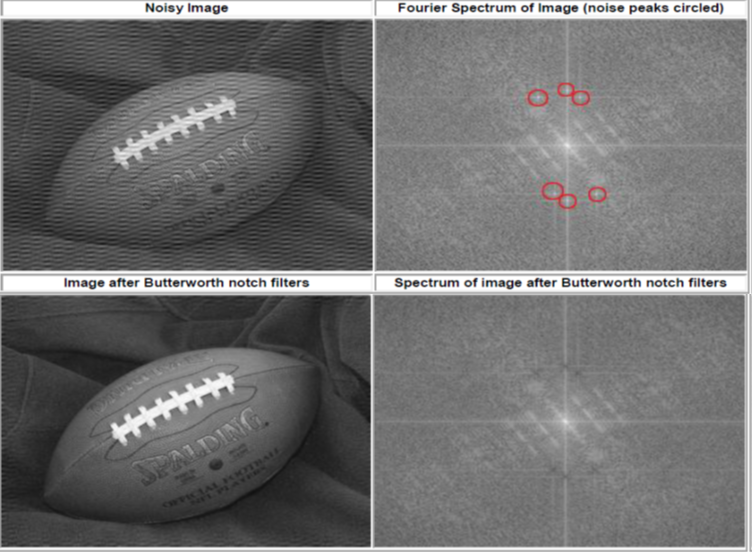

In [18]:
url_2 = 'http://users.accesscomm.ca/bostrum/Imaging/tips/images/FFTeg2/ClownOrig.jpg'

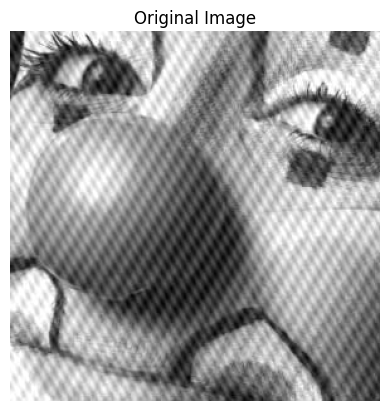

In [19]:
img_2 = cv2.cvtColor(generate_img(url_2), cv2.COLOR_BGR2GRAY)
show_img(img_2, 'Original Image', 'gray')

## Original Image to Fourier Transformed Image

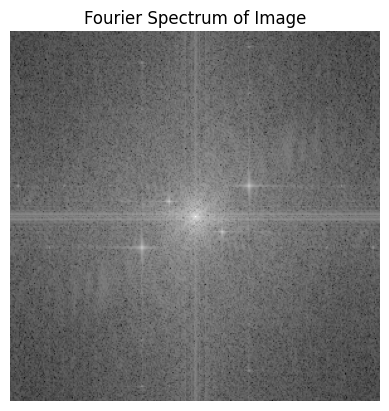

In [20]:
F = np.fft.fft2(img_2)
F = np.fft.fftshift(F)
show_img(np.log(np.abs(F)), 'Fourier Spectrum of Image', 'gray')

> There are some undesired noises that appear as white spots.

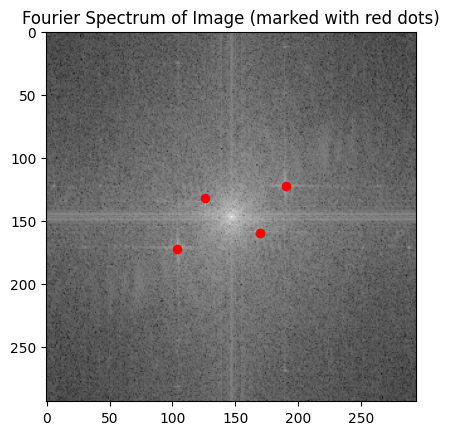

In [21]:
plt.plot(104, 172, 'ro')
plt.plot(126, 132, 'ro')
plt.plot(170, 160, 'ro')
plt.plot(190, 122, 'ro')
show_img(np.log(np.abs(F)), 'Fourier Spectrum of Image (marked with red dots)', 'gray')
plt.axis('on')
plt.show()

> There are 4 major white spots marked with red dots.

## Notch Reject Filter Function

> The formula used for Notch Reject Filter function:

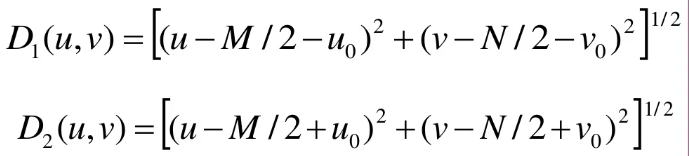

In [22]:
def notch_reject_filter(shape, D0=5, u0=0, v0=0):  
  M, N = shape
  H = np.zeros((M, N))
  for u in range(M):
    for v in range(N):
      D1 = np.sqrt((u - M / 2 - u0) ** 2 + (v - N / 2 - v0) ** 2)
      D2 = np.sqrt((u - M / 2 + u0) ** 2 + (v - N / 2 + v0) ** 2)
      if D1 <= D0 or D2 <= D0:
        H[u, v] = 0.0
      else:
        H[u, v] = 1.0
  return H

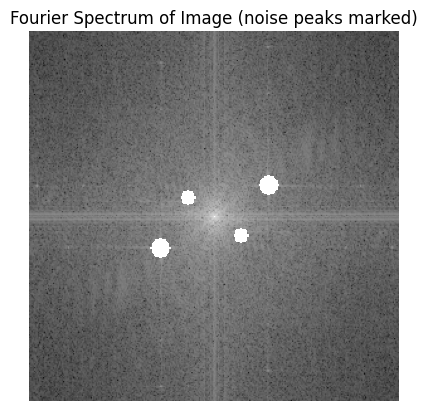

In [23]:
H1 = notch_reject_filter(F.shape, 7, 25, -43)
H2 = notch_reject_filter(F.shape, 5, 15, 21)

notchFilter = H1 * H2
img_notchReject = F * notchFilter

show_img(np.log(abs(img_notchReject)), 'Fourier Spectrum of Image (noise peaks marked)', 'gray')

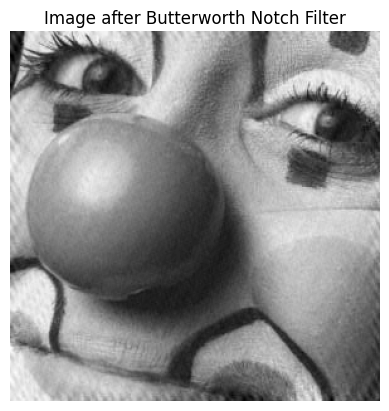

In [24]:
img_butterworthNotch = np.fft.ifftshift(img_notchReject)
img_butterworthNotch = np.fft.ifft2(img_butterworthNotch)

show_img(abs(img_butterworthNotch), 'Image after Butterworth Notch Filter', 'gray')

## Result

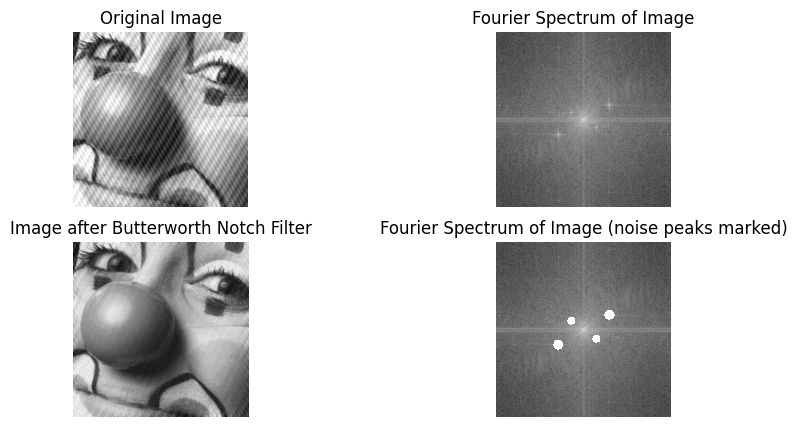

In [25]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
show_img(img_2, 'Original Image', 'gray')
plt.subplot(2, 2, 2)
show_img(np.log(np.abs(F)), 'Fourier Spectrum of Image', 'gray')
plt.subplot(2, 2, 3)
show_img(abs(img_butterworthNotch), 'Image after Butterworth Notch Filter', 'gray')
plt.subplot(2, 2, 4)
show_img(np.log(abs(img_notchReject)), 'Fourier Spectrum of Image (noise peaks marked)', 'gray')